(toolboxes:droplet_reconstruction:from_code)=

# Droplet reconstruction from code

In this tutorial, you will learn how to use the droplet reconstruction toolbox from code. The toolbox is part of the `napari_stress` package and can be imported as follows:

In [1]:
from napari_stress import sample_data, reconstruction
import napari
import numpy as np

We first create a napari viewer and add some sample data:

In [2]:
viewer = napari.Viewer(ndisplay=3)

Assistant skips harvesting pyclesperanto as it's not installed.


In [3]:
example_data = sample_data.get_droplet_4d()[0][0]
viewer.add_image(example_data, name='droplet')

<Image layer 'droplet' at 0x22899c861f0>

The reconstruction requires some arguments to be set. For more information about the arguments, see the [interactive](toolboxes:droplet_reconstruction:interactive) version of the toolbox.

In [5]:
arguments = {
    'voxelsize': np.array([2, 1, 1]),
    'target_voxelsize': 1,
    'resampling_length': 2.5,
    'interpolation_method'  : 'linear',
    'return_intermediate_results': True
}

You can also display all arguments and their meaning inside the notebook:

In [6]:
reconstruction.reconstruct_droplet?

Signature:
reconstruction.reconstruct_droplet(
    image: <function NewType.<locals>.new_type at 0x00000228FAD2D160>,
    voxelsize: numpy.ndarray = None,
    target_voxelsize: float = 1.0,
    smoothing_sigma: float = 1.0,
    n_smoothing_iterations: int = 10,
    n_points: int = 256,
    n_tracing_iterations: int = 1,
    resampling_length: float = 5,
    fit_type: str = 'fancy',
    edge_type: str = 'interior',
    trace_length: float = 10,
    remove_outliers: bool = True,
    outlier_tolerance: float = 1.5,
    sampling_distance: float = 0.5,
    interpolation_method: str = 'cubic',
    return_intermediate_results: bool = False,
) -> List[LayerDataTuple]
Docstring:
Reconstruct droplet surface from points layer.

Parameters
----------
image : ImageData
    Image data.
voxelsize : np.ndarray, optional
    Voxel size of image. The default is None.
target_voxelsize : float, optional
    Target voxel size for reconstruction. The default is 1.0.
smoothing_sigma : float, optional
    Sig

Anyway - run the reconstruction with the following command. The result variable `results_reconstruction` contains all intermediate results:

In [7]:
results_reconstruction = reconstruction.reconstruct_droplet(example_data, **arguments)

You can add all the results layers to the viewer like this:

In [8]:
for result in results_reconstruction:
    layer = napari.layers.Layer.create(result[0], result[1], result[2])
    viewer.add_layer(layer)

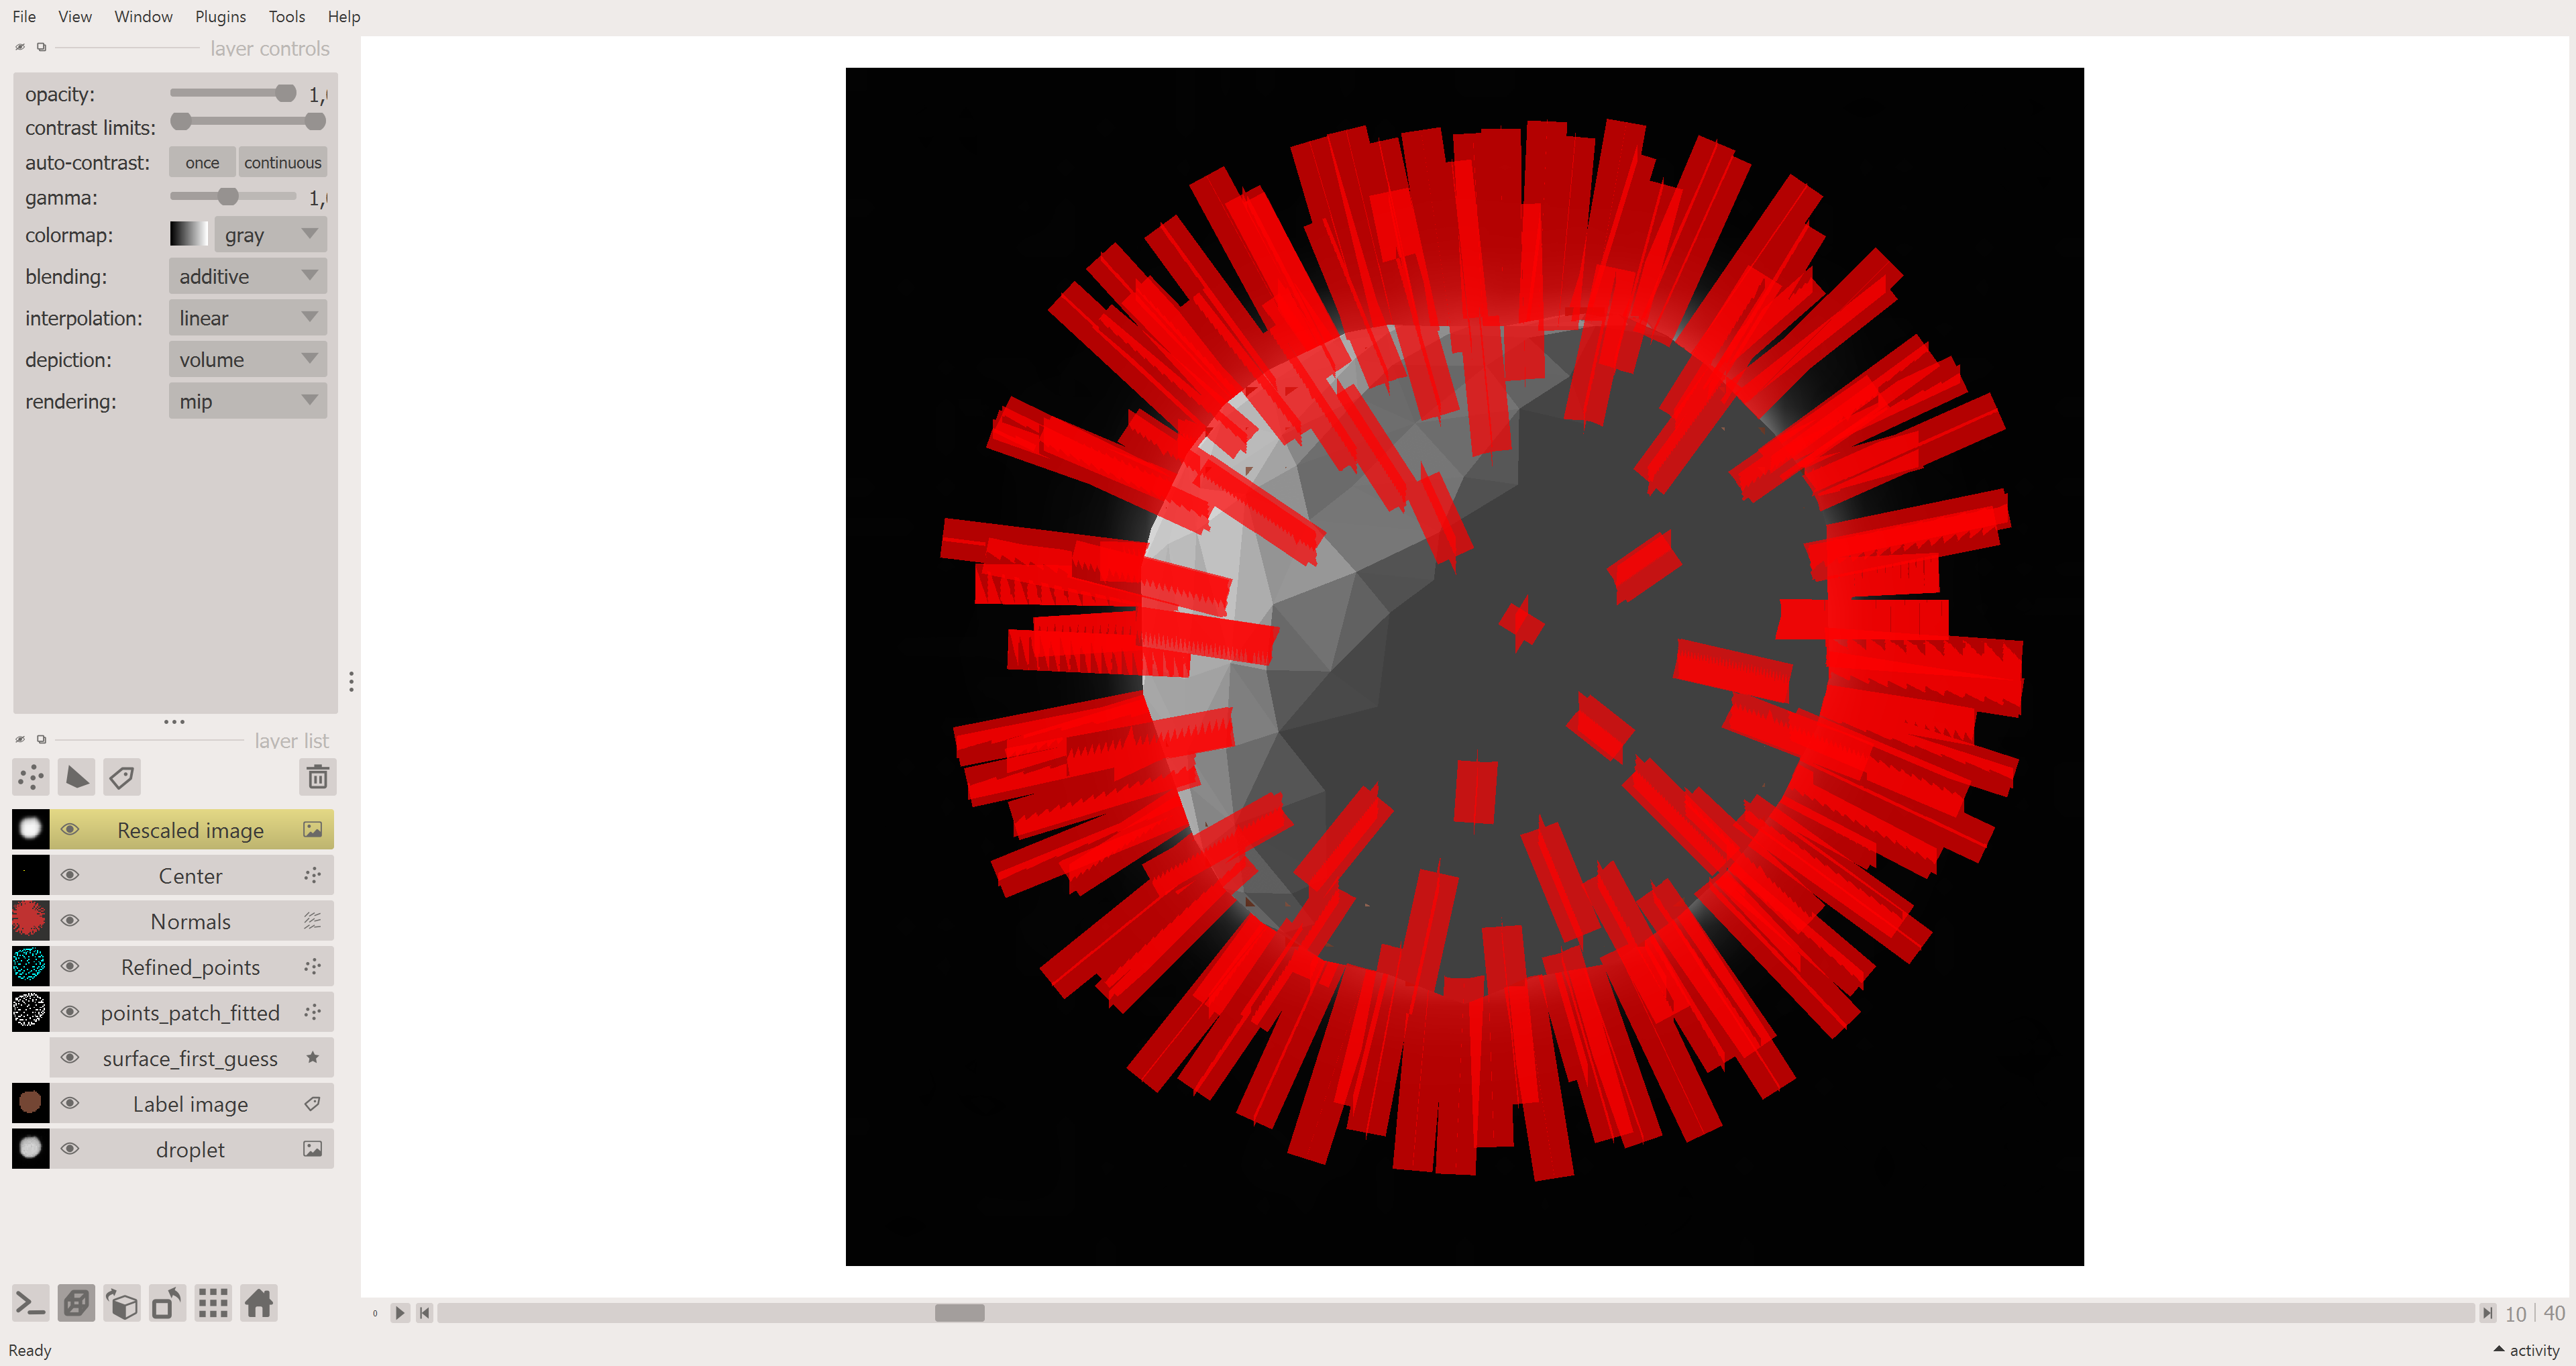

In [9]:
napari.utils.nbscreenshot(viewer)